# Searching for specific features
-----
Dec 2016.

In [1]:
# preamble
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from labm8 import fs
from labm8 import viz

import clgen
from clgen import corpus

## Experimental Setup

**Target code:**

In [2]:
# print(data[0]['data']['start_code'])
# print("// features:", data[0]['data']['start_features'])

## Experimental results

search/search-A-1.log
search/search-A-2.log
search/search-A-3.log
search/search-A-4.log
search/search-A-5.log
search/search-A-6.log


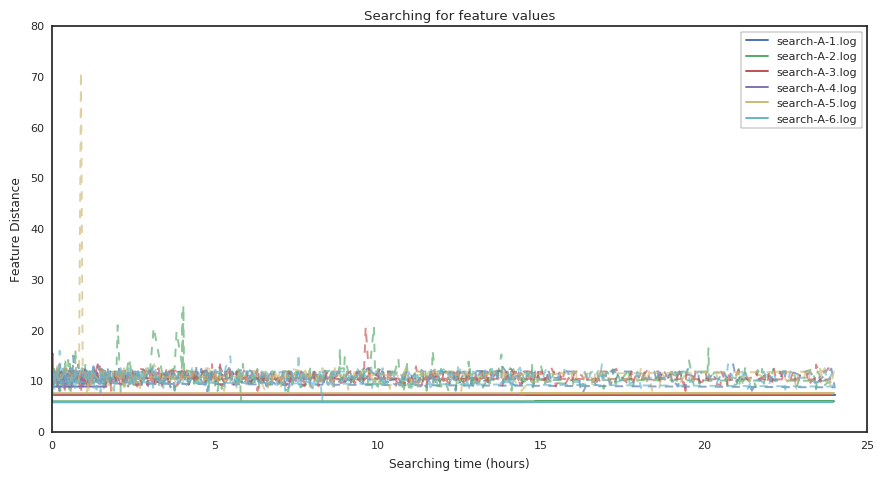

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from labm8 import viz
plt.style.use(["seaborn-white", "seaborn-paper"])

def get_distances(log):
    """ return list of best distances per step """
    
    return dates, bests

logs = [
    'search/search-A-1.log',
    'search/search-A-2.log',
    'search/search-A-3.log',
    'search/search-A-4.log',
    'search/search-A-5.log',
    'search/search-A-6.log',
]

for log in logs:
    print(log)
    data = clgen.load_json_file(log)
    start_time = datetime.strptime(data[0]['date'], '%Y-%m-%d %H:%M:%S')
    dates = [0]
    bests = [data[0]['data']['distance']]
    distances = [data[0]['data']['distance']]
    for entry in data:
        if entry.get("name") == "step" and not entry['data'].get("step_back"):
            timestamp = datetime.strptime(entry['date'], '%Y-%m-%d %H:%M:%S') 
            time = (timestamp - start_time).seconds / 60 / 60
            dates.append(time)
            bests.append(entry['data']['best']['distance'])
            distances.append(entry['data']['distance'])
    
    line, = plt.plot(dates, bests, label=fs.basename(log))
    plt.plot(dates, distances, alpha=.65, color=line.get_color(), linestyle='--')

ax = plt.gca()
plt.legend(loc='upper right')
ax.get_legend().set_title("")
ax.get_legend().draw_frame(True)

plt.title("Searching for feature values")
plt.xlabel("Searching time (hours)")
plt.ylabel("Feature Distance")
viz.finalise(figsize=(9, 5))

In [5]:
for log in logs:
    data = clgen.load_json_file(log)
    i = 0
    start_code = data[0]['data']["start_code"]
    start_distance = data[0]['data']["distance"]
    best_distance = data[-1]['data']['best']['distance']
    best_code = data[-1]['data']['best']['code']
    
    diff = 1 - (best_distance / start_distance)
    print("//", log, "INIT distance: {:.2f}".format(start_distance))
    print(start_code)
    print("//", log, "BEST distance: {:.2f} ({:.2f}%)".format(best_distance, -diff * 100))
    print(best_code)
    print()

// search/search-A-1.log INIT distance: 11.03
__kernel void A(__global float* a, __global float* b, __global float* c, const int d) {
  int e = get_global_id(0);

  if (e < d)
    b[e] = b[e];
}
// search/search-A-1.log BEST distance: 7.35 (-33.34%)
__kernel void A(__global float* a, __global float* b, __global float* c, const int d) {
  int e = get_global_id(0);

  if (e < d)
    b[e] = d * c[2 * e + 0];
  else if (e < 8)
    c[e] = a[e] + c[e + 3];
}

// search/search-A-2.log INIT distance: 9.54
__kernel void A(__global float* a, __global float* b, __global float* c, const int d) {
  int e = get_global_id(0);

  if (e >= d)
    return;

  int f = e << 2;
  c[e] = a[f] + b[f];
}
// search/search-A-2.log BEST distance: 6.10 (-36.05%)
__kernel void A(__global float* a, __global float* b, __global float* c, const int d) {
  int e = get_global_id(0);

  if (e >= d)
    return;

  for (int f = 0; f < d; f++) {
    if (e + d % 4 + f < 2 && e < d)
      b[e] += b[e - 4];
  }
  if (e > c)
   